## <span>CLUSTERING TECHNIQUES</span>

A1. K-means algorithm will be utilized in this instance as the clustering method.


A2. Investors in the company will benefit from understanding which customers are most likely to churn since this will allow them to mainly focus on selling upgraded services to customers with any of these characteristics. This research methodology strives to deliver pertinent data to help organizational managers understand their clients better.

B1. Patterns in our data are discovered using k-means clustering. As a response, we strive to classify and categorize our clients according to common 
traits. A good clustering solution finds clusters with more similar observations within each group than the clusters themselves. Hierarchical and k-means are the two clustering strategies presented in this job. A key disadvantage of hierarchical clustering is runtime. While the dataset we're looking at isn't huge, neither is the machine I'm utilizing. We use the k-means method for this purpose. We need to show stakeholders whose customer groupings (clusters) are comparable as well as how similar different customer groups are.

B2. The K-Means clustering method assumes that the clusters must be of equal size. The density of clusters aids in determining the cluster's limits. This assumption also aids in determining the number of data points required for each set.

B3. 
Numpy is primarily used for working with arrays. Pandas load dataset into the .py space from other platforms (from .csv). Seaborn is used for data visualization purposes. Also, it's more at ease with Pandas data frames. Matplotlib is primarily used for plotting charts.
The Scikit-learn package can be used for splitting, fitting, and predicting by incorporating several metrics into machine learning models.
Scipy is a library that specifically includes the K-means algorithm and accompanying techniques, as well as scaling and normalization algorithms.
Jupyter notebook will support this project, and datasets are analyzed in Python. Python is a programming language that focuses on readability and cross-platform compatibility. It is fast and well-suited for large-scale machine learning deployment compared to other programming languages like R.

C1. The dataset's completeness and lack of abnormalities should be assessed as a critical preprocessing objective. Determining whether binary independent variables should be encoded as dummy variables to be included in the analysis is also essential for k-means clustering. This unsupervised classification procedure has ultimately been decided against using binary dummy variables.

C2. Both continuous and categorical variables were used to conduct the analysis on the initial dataset. The matrix of features contains all features except for the four identification number columns at the top of the.csv file. Many of the variables that aren't thought of as characteristics will be eliminated during the cleaning phase.
The variables that will mostly be used for visualization are "Tenure," "Bandwidth GB Year," "Income" and "MonthlyCharge".

C3. The following procedures will be utilized to get the data ready:
1. Use the read_csv command in Pandas to read the dataset into a Python Data Frame.
2. Examine any probable misspellings, difficult variable names, and missing data while evaluating the data structure.
3. Use histograms, box plots, and scatter plots to examine descriptive statistics to look to check for outliers that might reveal or hide the statistical significance
4. Eliminate categorical variables from the dataset that are not as meaningful and export the cleaned dataset for use in the K-means clustering model.

Churn will be the categorical target variable. Continous predictor variables are listed below: 
1. Children
2. Income
3. Age
4. Bandwidth_GB_Year
5. Tenure
6. MonthlyCharge
7. Yearly_equip_failure
8. Email
9. Contacts
10. Outage_sec_perweek

Binary categorical variables with only the two values "Yes" or "No" make up all categorical predictor variables. The following will be encoded as 1 or 0, with 1 signifying "Yes" and 0 signifying "No." The file also contains ordinal numerical data. Decision-making may benefit from consumer survey responses grading various customer service characteristics on a scale of 1 to 8. (Item1 to Item8)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sklearn 
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq

In [3]:
newchurns = pd.read_csv('churn_clean.csv')
newchurns.shape #Dataset size

(10000, 50)

In [4]:
newchurns = newchurns.drop(columns = ['CaseOrder', 'Zip', 'Customer_id', 'Interaction', 'UID', 'Lat', 'Lng']) #CaseOrder, Zip, Lat and Long's statistics doesn't really matter.

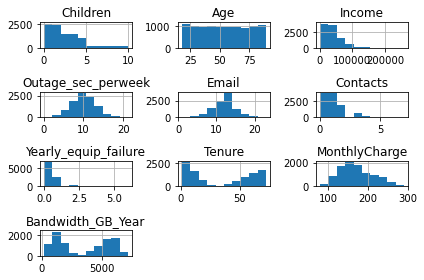

In [8]:
newchurns[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge','Bandwidth_GB_Year']].hist()

plt.tight_layout()

<AxesSubplot:xlabel='Tenure', ylabel='MonthlyCharge'>

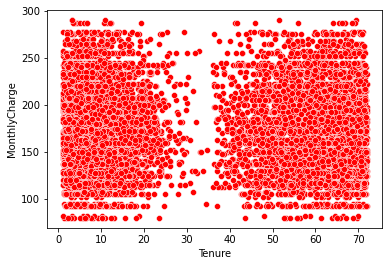

In [9]:
sns.scatterplot(x = newchurns['Tenure'], y = newchurns['MonthlyCharge'], color = 'red')

<AxesSubplot:xlabel='Income', ylabel='MonthlyCharge'>

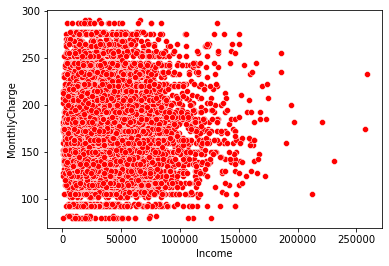

In [10]:
sns.scatterplot(x = newchurns['Income'], y = newchurns['MonthlyCharge'], color = 'red')

<AxesSubplot:xlabel='Tenure', ylabel='Bandwidth_GB_Year'>

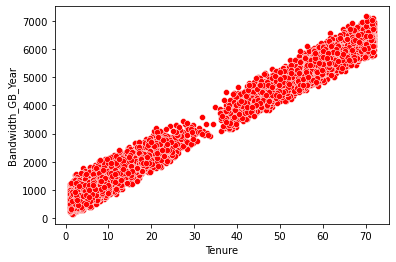

In [11]:
sns.scatterplot(x = newchurns['Tenure'], y = newchurns['Bandwidth_GB_Year'], color = 'red')

In [ ]:
null_value = newchurns.isnull().sum()
print(null_value)
#This is a cleaned churn dataset, 
#which means there are no null values or other outliers visible.

In [ ]:
# List features for analysis
features = (list(newchurns.columns[:-1]))
print('Features for analysis include: \n', features)


C4: Cleaned Dataset

In [18]:
# Extract Clean dataset
newchurns.to_csv('churn_prepared_kmeans.csv')


D1. Three sets of paired relevant features were built using the Scikit-learn KMeans class to produce valuable recommendations to understand our users better. These were the three sets:
MonthlyCharge and Income, Bandwidth_GB_Year and Tenure, and MonthlyCharge and Tenure. The ideal number of clusters was then determined by applying the scree plot elbow approach to each set.

D2. Code Execution

In [19]:
churn_df = pd.read_csv('churn_prepared_kmeans.csv')

KMeans - Tenure vs. MonthlyCharge

In [ ]:
X = churn_df.iloc[:, [33, 34]].values

In [24]:
kmeans = KMeans(n_clusters=6)
y_predicted = kmeans.fit_predict(X)
y_predicted

array([3, 1, 3, ..., 0, 4, 4])

In [25]:
churn_df['cc']=y_predicted

In [26]:
kmeans.cluster_centers_

array([[ 59.96652254, 179.14715882],
       [  9.0260305 , 235.13944116],
       [  9.02562595, 130.82990701],
       [  9.27245465, 178.06362074],
       [ 59.69810112, 237.11252805],
       [ 59.99088852, 131.34674562]])

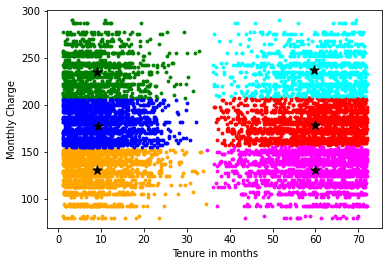

In [31]:
df1 = churn_df[churn_df.cc==0]
df2 = churn_df[churn_df.cc==1]
df3 = churn_df[churn_df.cc==2]
df4 = churn_df[churn_df.cc==3]
df5 = churn_df[churn_df.cc==4]
df6 = churn_df[churn_df.cc==5]
plt.scatter(df1.Tenure,df1.MonthlyCharge, s = 8, color='red')
plt.scatter(df2.Tenure,df2.MonthlyCharge, s = 8, color='green')
plt.scatter(df3.Tenure,df3.MonthlyCharge, s = 8, color='orange')
plt.scatter(df4.Tenure,df4.MonthlyCharge, s = 8, color='blue')
plt.scatter(df5.Tenure,df5.MonthlyCharge, s = 8, color='cyan')
plt.scatter(df6.Tenure,df6.MonthlyCharge, s = 8, color='magenta')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 90, color='black', marker = '*', label='centroid')
plt.xlabel('Tenure in months')
plt.ylabel('Monthly Charge')
plt.show()


In [22]:
sse = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 52)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

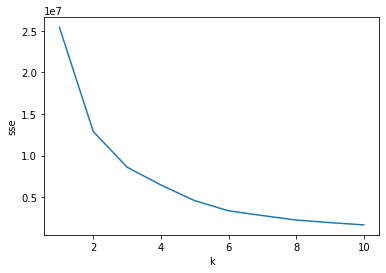

In [23]:
plt.plot(range(1, 11), sse)
plt.xlabel('k')
plt.ylabel('sse')
plt.show()

KMeans- Income vs. MonthlyCharge

In [32]:
X = churn_df.iloc[:, [10, 34]].values


In [35]:
kmeans = KMeans(n_clusters=4)
y_predicted = kmeans.fit_predict(X)
y_predicted

array([2, 2, 2, ..., 0, 2, 2])

In [36]:
churn_df['cc']=y_predicted
kmeans.cluster_centers_

array([[ 41132.14201447,    173.31042106],
       [120030.0476383 ,    171.14276574],
       [ 17018.88512625,    172.54267578],
       [ 71713.91784414,    171.87532769]])

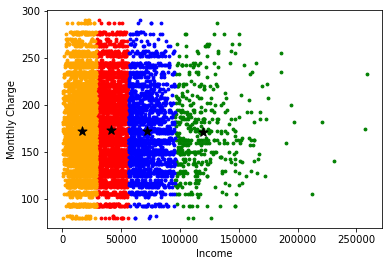

In [37]:
df1 = churn_df[churn_df.cc==0]
df2 = churn_df[churn_df.cc==1]
df3 = churn_df[churn_df.cc==2]
df4 = churn_df[churn_df.cc==3]
plt.scatter(df1.Income,df1.MonthlyCharge, s = 8, color='red')
plt.scatter(df2.Income,df2.MonthlyCharge, s = 8, color='green')
plt.scatter(df3.Income,df3.MonthlyCharge, s = 8, color='orange')
plt.scatter(df4.Income,df4.MonthlyCharge, s = 8, color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 90, color='black', marker = '*', label='centroid')
plt.xlabel('Income')
plt.ylabel('Monthly Charge')
plt.show()

In [33]:
sse = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 52)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

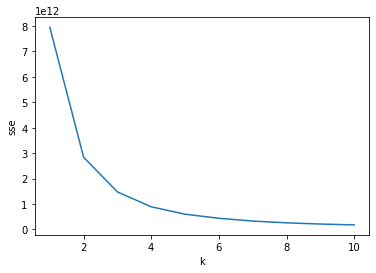

In [34]:
plt.plot(range(1, 11), sse)
plt.xlabel('k')
plt.ylabel('sse')
plt.show()

KMeans - Tenure vs. Bandwidth_GB_Year

In [38]:
X = churn_df.iloc[:, [33, 35]].values

In [41]:
kmeans = KMeans(n_clusters=2)
y_predicted = kmeans.fit_predict(X)
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
churn_df['cc']=y_predicted
kmeans.cluster_centers_

array([[  59.99431663, 5480.32565907],
       [   9.23065599, 1318.50762173]])

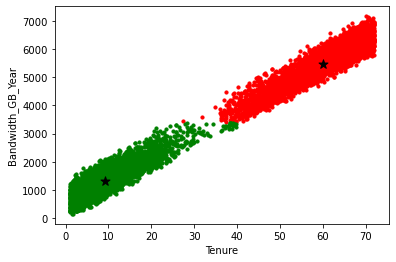

In [43]:
df1 = churn_df[churn_df.cc==0]
df2 = churn_df[churn_df.cc==1]
plt.scatter(df1.Tenure,df1.Bandwidth_GB_Year, s = 10, color='red')
plt.scatter(df2.Tenure,df2.Bandwidth_GB_Year, s = 10, color='green')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 90, color='black', marker = '*', label='centroid')
plt.xlabel('Tenure')
plt.ylabel('Bandwidth_GB_Year')
plt.show()

In [39]:
sse = []
for i in range(1, 11):  
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 52)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

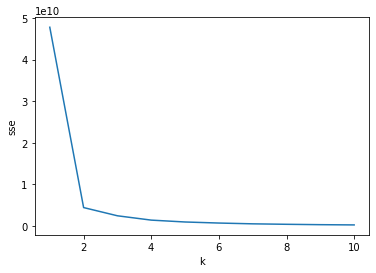

In [40]:
plt.plot(range(1, 11), sse)
plt.xlabel('k')
plt.ylabel('sse')
plt.show()

E1. Accuracy of Clustering Technique

Verifying the clustering technique is a little more complex than supervised machine learning algorithms because the clustering process does not use ground truth labels. Three parameters will be considered to gauge how accurate k-means clustering is. Understanding the accuracy will be significantly influenced by the clustering propensity, the number of clusters, and the quality of the sets. Many of the variables picked were non-uniformly distributed to perform the analysis. The elbow approach was implemented to determine the k values to plot within-cluster variation for the ideal number of clusters, as seen in the scree plots above. The results of the elbow test indicate all sets to have an optimal k values to set as 2 (different from the initial assumptions)

E2. Limitation

The fact that this particular dataset is not coming from a repository is a constraint for our research. In this case, it appears as though we used Py statistical software packages to arbitrarily create the data. To find out whether A/B analysis or other assessments could be more helpful for answering questions about customer attrition, we cannot get in touch with the team who structured and obtained this data. In an actual study, perhaps, we would be able to go to the department that collected the data and, possibly, find more meaningful results through a more exacting, targeted method.

E3. Course of Action

Customers are less likely to abandon the business as they sign up for more services it offers. It is preferable to provide customers with more benefits and enhance their relationship with the company by educating them about all the options available to them as subscribers, not just basic mobile telephone coverage.
There is a group of consumers whose monthly fees are minimal despite their considerable income. These groups ought to be the focus of additional marketing efforts and contact with our advertising.
Additionally, many low-income clients pay both high and cheap monthly fees. As an ethical business, we should be careful not to target these market segments because they lack the money for luxury or high-end services. These customers may be unable to make their monthly payments and possibly leave our business to switch to other businesses' "free trial" offers, leaving us with unpaid bills.